# Workflow & Hyperparameter Optimization

In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

🏠 Import the house price data set. We will keep only numerical features for the sake of simplicity

🎯 Your goal will be to fit the best KNN Regressor. In particular, how many "neighbors" (<font color=blue>K</font> in <font color=blue>K</font>NN) should you consider to get the best predictions for your house prices ?

In [2]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv', index_col="Id")

# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()

data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [3]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## 1. Train/Test split

❓ **Question (Holdout)**❓

👇 Split the dataset to create your `X_train` `X_test` and `y_train` `y_test`. Use:
- `test_size=0.3`
- `random_state=0` to compare your results with your buddy

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [14]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [12]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1035,30,50.0,6305,5,7,1938,1950,0.0,0,0,...,240,0,0,0,0,0,0,0,6,2007
1179,50,54.0,7681,5,6,1921,1950,0.0,0,0,...,186,192,0,102,0,0,0,0,7,2009
467,20,85.0,10628,7,5,1970,1970,0.0,778,0,...,526,0,0,0,0,176,0,0,4,2007
772,20,67.0,8877,4,5,1951,1951,0.0,836,0,...,396,0,0,0,0,0,0,0,4,2006
359,80,92.0,6930,5,4,1958,1958,120.0,300,294,...,288,168,0,294,0,0,0,0,7,2006


## 2. Scaling

In [13]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
633,20,85.0,11900,7,5,1977,1977,209.0,822,0,...,544,192,0,0,0,0,0,0,4,2009
196,160,24.0,2280,6,6,1976,1976,0.0,566,0,...,440,87,0,0,0,0,0,0,7,2009
507,60,80.0,9554,8,5,1993,1994,125.0,380,0,...,471,182,81,0,0,0,0,0,9,2006
1159,20,92.0,11932,8,5,2007,2008,186.0,0,0,...,830,0,24,0,0,0,0,0,6,2008


⚖️ Scaling is always crucially important for the KNN algorithm..

❓ **Question (Scaling)** ❓ 

* Scale your train set and test set.
* Here, let's simply apply the `StandardScaler` and not waste time choosing one scaler per feature. Indeed, the goals of this exercise are to:
    * review KNN
    * understand GridSearchCV
    * understand RandomizedSearchCV

In [15]:
standard_scaler = StandardScaler()
X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']] = standard_scaler.fit_transform(X_train)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1035,-0.634872,-0.911064,-0.673677,-0.883788,1.310582,-1.101973,-1.734697,-0.573486,-0.990202,-0.279257,...,-1.381330,-0.775802,-0.717556,-0.362253,-0.126143,-0.277773,-0.035737,-0.144676,-0.121508,-0.626678
1179,-0.167181,-0.727729,-0.413295,-0.883788,0.392355,-1.648226,-1.734697,-0.573486,-0.990202,-0.279257,...,-1.662491,0.837760,-0.717556,1.300604,-0.126143,-0.277773,-0.035737,-0.144676,0.253540,0.882741
467,-0.868717,0.693119,0.144370,0.571863,-0.525873,-0.073733,-0.776375,-0.573486,0.771754,-0.279257,...,0.107787,-0.775802,-0.717556,-0.362253,-0.126143,2.891945,-0.035737,-0.144676,-0.871602,-0.626678
772,-0.868717,-0.131889,-0.186974,-1.611613,-0.525873,-0.684251,-1.686780,-0.573486,0.903109,-0.279257,...,-0.569084,-0.775802,-0.717556,-0.362253,-0.126143,-0.277773,-0.035737,-0.144676,-0.871602,-1.381388
359,0.534354,1.013956,-0.555407,-0.883788,-1.444100,-0.459323,-1.351368,0.040851,-0.310785,1.478123,...,-1.131408,0.636064,-0.717556,4.430688,-0.126143,-0.277773,-0.035737,-0.144676,0.253540,-1.381388


In [16]:
X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']] = standard_scaler.fit_transform(X_test)
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1457,-0.862430,0.430096,0.197500,-0.148940,0.458547,0.189919,0.165463,0.107271,0.664651,0.928789,...,0.013209,1.995504,-0.723275,-0.343514,-0.077221,-0.28205,-0.121996,-0.135967,-1.601487,1.689100
633,-0.862430,0.430096,0.094807,0.568098,-0.525723,0.157197,-0.350843,0.622722,0.725615,-0.298433,...,0.246101,0.770264,-0.723275,-0.343514,-0.077221,-0.28205,-0.121996,-0.135967,-0.869689,0.949845
196,2.708386,-1.668525,-0.680020,-0.148940,0.458547,0.124476,-0.397780,-0.574270,0.237903,-0.298433,...,-0.304371,-0.049163,-0.723275,-0.343514,-0.077221,-0.28205,-0.121996,-0.135967,0.228008,0.949845
507,0.157803,0.258078,-0.094147,1.285135,-0.525723,0.680736,0.447085,0.141634,-0.116450,-0.298433,...,-0.140288,0.692224,0.683339,-0.343514,-0.077221,-0.28205,-0.121996,-0.135967,0.959806,-1.267922
1159,-0.862430,0.670922,0.097385,1.285135,-0.525723,1.138832,1.104202,0.490996,-0.840397,-0.298433,...,1.759896,-0.728118,-0.306500,-0.343514,-0.077221,-0.28205,-0.121996,-0.135967,-0.137891,0.210589


## 3. Baseline KNN model

❓ **Question (A baseline for our KNN)** ❓

Cross-validate (*cv = 5*) a simple KNN regressor taking into account only _the closest neighbor_, and compute the average score over the 5 folds.

In [21]:
cv_results = cross_validate(KNeighborsRegressor(n_neighbors=1), X_train,y_train,cv=5)
KNN_average = cv_results['test_score'].mean()
KNN_average

0.5900441216552185

## 4. GridSearch

### 4.1. A first GridSearch

❓ **Question (GridSearch v1)**❓

Let's use SKLearn `GridSearchCV` to find the best KNN hyperparameter `n_neighbors`.
- Start a coarse-grain approach, with `n_neighbors` = [1,5,10,20,50]
- 5-fold cross-validate each parameter
- Make sure to maximize your performance time using `n_jobs`

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate model
model = KNeighborsRegressor()

# Hyperparameter Grid
grid = {'n_neighbors': [1,5,10,20,50]}

# Instantiate Grid Search
search = GridSearchCV(model, grid, scoring = 'r2', cv=5, n_jobs=-1 )

# Fit data to Grid Search
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]}, scoring='r2')

❓ **Question (best parameters)** ❓

According to the GridSearch, what is the optimal K value?

In [25]:
search.best_params_

{'n_neighbors': 10}

❓ **Question (scoring)** ❓ What is the best score the optimal K value produced?

In [26]:
search.best_score_

0.7613430263772498

### 4.2. A second GridSearch

❓ **Question (GridSearch V2)** ❓


Now, we have an idea about where the best $K$ lies, but some of the values we didn't try could result in a  better performance.

* Re-run a GridSearch trying some values for $K$ around to your previous best value
* What are the `best_score` and `best_k` for this refined GridSearch?

In [44]:
# Instantiate model
model_2 = KNeighborsRegressor()

# Hyperparameter Grid
grid = {'n_neighbors': [10,11,12,13,14,15]}

# Instantiate Grid Search
search_2 = GridSearchCV(model, grid, scoring = 'r2', cv=5, n_jobs=-1)

# Fit data to Grid Search
search_2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [10, 11, 12, 13, 14, 15]},
             scoring='r2')

In [45]:
best_k = search_2.best_params_['n_neighbors']
best_k

10

In [46]:
best_score = search_2.best_score_
best_score

0.7613430263772498

***🧪 Test your code***

In [47]:
from nbresult import ChallengeResult
result = ChallengeResult('knn',
                         best_k=best_k,
                         best_score=best_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/leomichel/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/leomichel/code/LeonMichel96/data-workflow/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_knn.py::TestKnn::test_best_k PASSED                                 [ 50%]
test_knn.py::TestKnn::test_best_score PASSED                             [100%]

============================== 2 passed in 0.31s ===============================


💯 You can commit your code:

git add tests/knn.pickle

git commit -m 'Completed knn step'

git push origin master



### 4.3. Visual check (manual GridSearch)

☝️ This problem is actually simple enough to perform a GridSearch manually.

❓ **Question(Manual GridSearch)** ❓

- Loop manually over all values of $K$ from $1$ to $50$ and store the average of the cross-validated scores of each model in a list.
- Plot the scores as a function of $K$ to visually find the best $K$ using the `Elbow Method`

In [49]:
scores = []
Ks = np.arange(1,51)
for i in range(1,51):
    cv_results = cross_validate(KNeighborsRegressor(n_neighbors=i), X_train, y_train, cv=5)
    scores.append(cv_results['test_score'].mean())
    
    

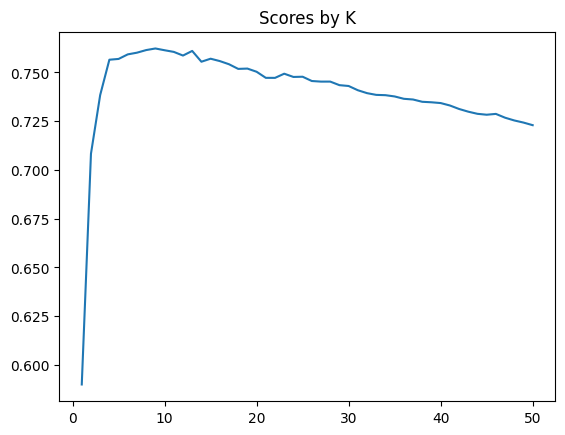

In [55]:
sns.lineplot(x=Ks, y=scores)
plt.title('Scores by K')
plt.show()

❓Can you guess what makes GridSearchCV a better option than such manual loop ?


<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to parallelize the search, utilizing all of your CPU cores
- What if you had multiple hyper-parameters to co-optimize?
</details>

## 5. GridSearch with multiple parameters

👩🏻‍🏫 KNNRegressor suppports various _distance metrics_ via the hyper-parameter `p` 

📚 [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

❓ **Question (tuning multiple parameters)** ❓


* Use GridSearchCV to search for the best $K$ and $p$ simultaneously.
    * Try all combinations for $K = [1, 5, 10, 20, 50]$ and $p = [1, 2, 3]$. 

In [58]:
model_3 = KNeighborsRegressor()
grid = {'n_neighbors': [1,5,10,20,50],
       'p':[1,2,3]}

search = GridSearchCV(model_3, grid, scoring='r2', cv=5, n_jobs=-1)
search.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50], 'p': [1, 2, 3]},
             scoring='r2')

In [59]:
search.best_params_

{'n_neighbors': 5, 'p': 1}

In [60]:
search.best_score_

0.8036197614296053

❓ **Question (number of submodels)**❓

How many submodels did you train overall?

<details>
    <summary>Hint</summary>

Much more than 15. Think twice :)
    <details>
    <summary>Answer</summary>

75 models due to CV=5
</details>

In [61]:
5*3*5

75

❓ **Question (best parameters and best score after tuning the model with multiple parameters)**❓

What are the *best parameters* and the *best score*?

In [62]:
best_parameters = search.best_params_
best_score = search.best_score_

## 6. Random Search

Now let's see whether a RandomizedSearch can find a better combination with the same number of models being fitted.

❓ **Question (RandomizedSearchCV)** ❓

Use `RandomizedSearchCV` to
- Randomly sample $K$ from a uniform `scipy.stats.randint(1,50)` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html)) distribution
- Sample $p$ from a list $[1,2,3]$
- Use the correct numbers of `n_iter` and `cv` to fit the exact same numbers of models as in your previous GridSearchCV.

In [68]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

#model_4 = KNeighborsRegressor()
grid = {'n_neighbors': stats.randint(1,50),
       'p': [1,2,3]}
search_random = RandomizedSearchCV(model_3, grid, scoring = 'r2', n_iter = 75, cv=5, n_jobs=-1 )
search_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=75, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f31fdc482e0>,
                                        'p': [1, 2, 3]},
                   scoring='r2')

In [69]:
search_random.best_params_

{'n_neighbors': 4, 'p': 1}

In [70]:
search_random.best_score_

0.8089800671486822

## 7. Generalization

❓ **Question (finetuning your model one more time)**❓

- Refine your RandomsearchCV if you want
- Choose your best model

In [71]:
grid_2 = {'n_neighbors': stats.randint(1,50),
       'p': [1,2,3,4,5]}
search_random_2 = RandomizedSearchCV(model_3, grid_2, scoring = 'r2', n_iter = 125, cv=5, n_jobs=-1 )
search_random_2.fit(X_train, y_train)

print(search_random_2.best_params_)
print(search_random_2.best_score_)

{'n_neighbors': 3, 'p': 1}
0.8066113321101754


Now try to display your `cv_results` as a `DataFrame`, this will help you visualize what's going on inside the CV! 😉

In [73]:
#

❓ **Question (Evaluation of the "best" model)** ❓

* Time has come to discover our model's performance with "best params" on the **unseen** test set `X_test`.
    * Compute the r2 score for the test set and save it as `r2_test`.

In [77]:
model_3.n_neighbors = 4
model_3.p = 1
model_3.fit(X_train,y_train)
r2_test = model_3.score(X_test, y_test)
r2_test

0.8081427478641293

❓ **Question (Taking a step back)** ❓

Would you consider the optimized model to generalize well?

<details><summary>Answer</summary>

Test score may decrease a bit with train set. Probably not more than 5%. This can be due to
- A non-representative train/test split
- A cross-val number too small leading to overfitting the model-tuning phase. The more you cross-validated, the more robust your findings will generalize - but you can't increase cv too much if your dataset is too small as you won't keep enough observations in each fold to be representative.
- Our dataset is very small and our hyperparameter optimization is thus extremely dependent (and overfitting) on our train/test split. Always make sure your dataset is much bigger than the total number of hyperparameter combinations you are trying out!
    
</details>

***🧪 Test your code***

In [78]:
from nbresult import ChallengeResult
result = ChallengeResult('r2', 
                         r2_test=r2_test)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/leomichel/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/leomichel/code/LeonMichel96/data-workflow/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_r2.py::TestR2::test_r2 PASSED                                       [100%]

============================== 1 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/r2.pickle

git commit -m 'Completed r2 step'

git push origin master



🏁 Congratulations! Now, you know how to finetune a model using either a GridSearchCV or a RandomizedSearchCV 

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!